# 190691B
# WIDANAGAMAGE T R

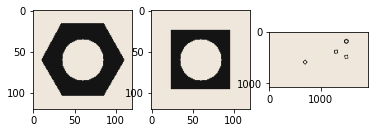

In [112]:


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()



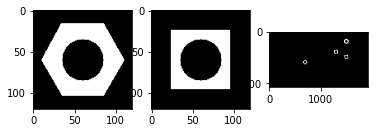

hexnut_template_gray threshold value is  20.0
squarenut_template_gray threshold value is  20.0
conveyor_f100_gray threshold value is  20.0


In [113]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

ret1,th1 = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3)
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(cv.cvtColor(th2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(th3, cv.COLOR_RGB2BGR))
plt.show()

print("hexnut_template_gray threshold value is ", ret1)
print("squarenut_template_gray threshold value is ", ret2)
print("conveyor_f100_gray threshold value is ", ret3)




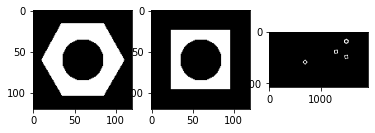

In [114]:
kernel = np.ones((3,3),np.uint8)

hexnut_template_gray_closing = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
squarenut_template_gray_closing = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
conveyor_f100_gray_closing = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template_gray_closing, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template_gray_closing, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100_gray_closing, cv.COLOR_RGB2BGR))
plt.show()

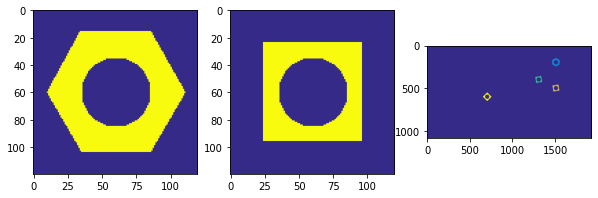

Hexnut
coonnected component no  1  Area is  9672 and centroid is [59.33684864 59.63513234]
coonnected component no  2  Area is  4728 and centroid is [59.83375635 59.22356176]
squarenut
coonnected component no  1  Area is  11173 and centroid is [59.5875772 59.5875772]
coonnected component no  2  Area is  3227 and centroid is [59.19677719 59.19677719]
convey_belt
coonnected component no  1  Area is  2059646 and centroid is [957.36323524 540.44416273]
coonnected component no  2  Area is  4636 and centroid is [1499.24201898  199.28515962]
coonnected component no  3  Area is  3087 and centroid is [1299.18302559  399.18302559]
coonnected component no  4  Area is  3087 and centroid is [1499.18302559  499.18302559]
coonnected component no  5  Area is  3144 and centroid is [700. 600.]


In [135]:
import numpy as np

image1, labels1, stats1, centroids1 = cv.connectedComponentsWithStats(hexnut_template_gray_closing)
image2, labels2, stats2, centroids2 = cv.connectedComponentsWithStats(squarenut_template_gray_closing)
image3, labels3, stats3, centroids3 = cv.connectedComponentsWithStats(conveyor_f100_gray_closing)

hexnut_template_colored = cv.applyColorMap((labels1/np.amax(labels1)*255).astype('uint8'), cv.COLORMAP_PARULA)
squarenut_template_colored = cv.applyColorMap((labels2/np.amax(labels2)*255).astype('uint8'), cv.COLORMAP_PARULA)
conveyor_f100_colored = cv.applyColorMap((labels3/np.amax(labels3)*255).astype('uint8'), cv.COLORMAP_PARULA)

fig, ax = plt. subplots(1,3, figsize =(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template_colored, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template_colored, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100_colored, cv.COLOR_BGR2RGB))
plt.show()

img_lis = ["Hexnut", "squarenut", "convey_belt"]
areas = [stats1, stats2, stats3]
centroidss = [centroids1, centroids2, centroids3]

for i in range(3):
    print(img_lis[i])
    for j in range(len(areas[i])):
        print("coonnected component no ", j+1, " Area is ", areas[i][j][-1], "and centroid is", centroidss[i][j] )


     

In [116]:
contours1, hierarchy1	=	cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2	=	cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3	=	cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

hexnut_temp_contour = contours1
square_temp_contour = contours2

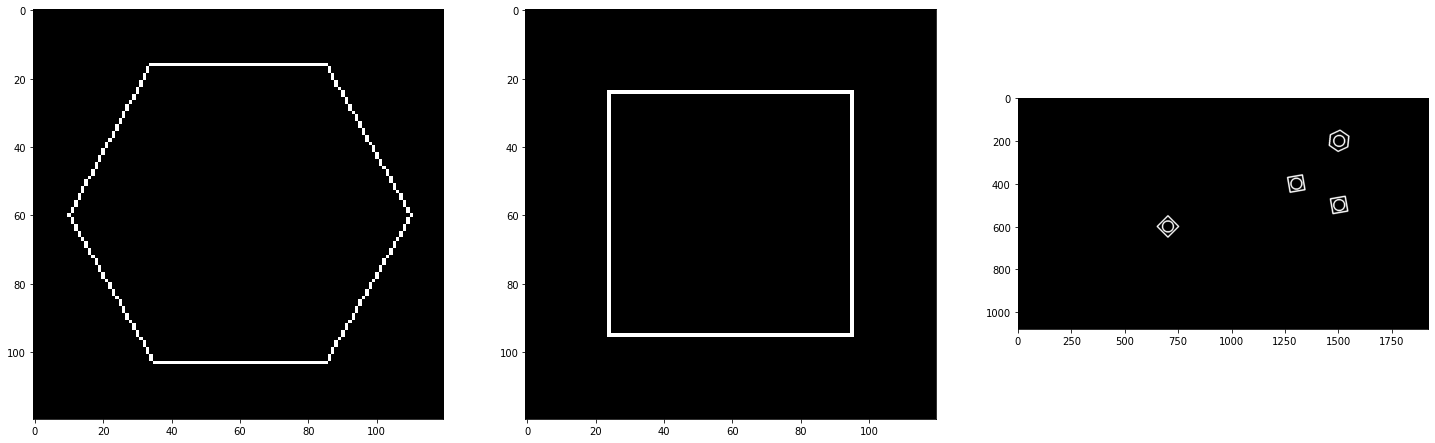

In [140]:

im1 = np.zeros(hexnut_template.shape[:-1]).astype(np.uint8)
im2 = np.zeros(squarenut_template.shape[:-1]).astype(np.uint8)
im3 = np.zeros(conveyor_f100.shape[:-1]).astype(np.uint8)

cv.drawContours(im1 , contours1, 0, (255,255,255), 1)
cv.drawContours(im2, contours2, 0, (255,255,255), 1)
cv.drawContours(im3, contours3,-1, (255,255,255), 6)

fig, ax = plt. subplots(1,3, figsize=(25,25))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(im2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(im3, cv.COLOR_RGB2BGR))
plt.show()

In [69]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame_ = []      
while cap.isOpened():                                    
    ret, frame = cap.read()  
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    frame_.append(frame.copy())

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [70]:
img1 = cv.imread('hexnut_template.png',0)
img2 = cv.imread('conveyor_f101.png',0)

ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[1]
contours,hierarchy = cv.findContours(thresh2,2,1)
match_count = 0
for i in contours:
    cnt2 = i
    ret = cv.matchShapes(cnt1,cnt2,1,0.0)
    if ret < 0.00001:
        match_count+=1
print("Hexaganol count is:" ,match_count )

Hexaganol count is: 1


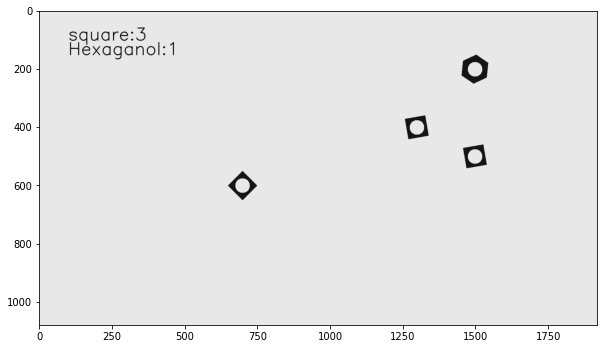

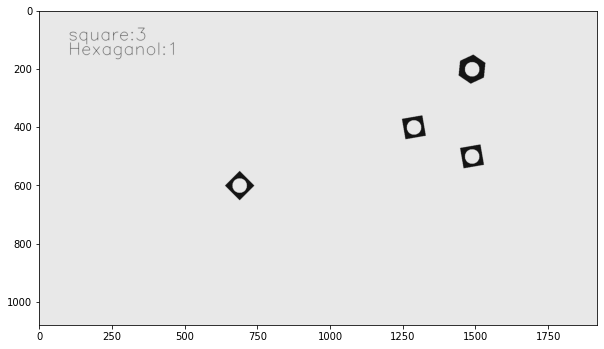

In [71]:
img1 = cv.imread('hexnut_template.png',0)
img2 =  cv.imread('squarenut_template.png',0)
img3 =  cv.imread('conveyor_f100.png',0)
img4 = cv.imread('conveyor_f101.png',0)

ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
ret, thresh3 = cv.threshold(img3, 127, 255,0)
ret, thresh4 = cv.threshold(img4, 127, 255,0)

contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[1]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[1]


#first belt image
contours,hierarchy = cv.findContours(thresh3,2,1)
cnt3 = contours
Hex_count = 0
square_count = 0

for i in cnt3:
    ret1 = cv.matchShapes(i,cnt1,1,0.0)
    if ret1 < 0.0001:
        Hex_count+=1
    ret2 = cv.matchShapes(i, cnt2, 1, 0.0)
    if ret2 < 0.001:
        square_count+=1
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
img = img3.copy()
cv.putText(img,"Hexaganol:" + str(Hex_count) , (100, 150), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2, cv.LINE_AA)
cv.putText(img,"square:" + str(square_count) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2, cv.LINE_AA)
cv.imshow('Conveyor', img)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt. subplots(figsize =(10,10))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

#second belt image
contours,hierarchy = cv.findContours(thresh4,2,1)
cnt4 = contours
Hex_count = 0
square_count = 0

for i in cnt4:
    ret1 = cv.matchShapes(i,cnt1,1,0.0)
    if ret1 < 0.0001:
        Hex_count+=1
    ret2 = cv.matchShapes(i, cnt2, 1, 0.0)

    if ret2 < 0.001:
        square_count+=1
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
img = img4.copy()
cv.putText(img,"Hexaganol:" + str(Hex_count) , (100, 150), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 1, cv.LINE_AA)
cv.putText(img,"square:" + str(square_count) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 1, cv.LINE_AA)
cv.imshow('Conveyor', img)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt. subplots(figsize =(10,10))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [156]:
# Yor code here.
frame_array = []
for fr in frame_[:]:
    fr = cv.cvtColor(fr, cv.COLOR_BGR2GRAY)                                  # area of hexagonal: 6730,6800 +-100
    ret, thresh = cv.threshold(fr, 127, 255,0)                              #area of square : 5200+-20
    contours,hierarchy = cv.findContours(thresh,2,1)                           #area of inside circle: 1890
    square_count = 0
    Hex_count = 0
    for con in contours:
        area = cv.contourArea(con)
        if (6715< area <6815):
            ret1 = cv.matchShapes(con, hexnut_temp_contour[0], 1, 0.0)
            if ret1 < 0.001:
                Hex_count+=1
        if (5150< area <5250):
            ret2 = cv.matchShapes(con, square_temp_contour[0], 1, 0.0)
            if ret2 < 0.001:
                square_count+=1
        # if not (6715< area <6815):break   
    img = fr.copy()
    cv.putText(img,"Hexaganol:" + str(Hex_count) , (100, 130), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    cv.putText(img,"square:" + str(square_count) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    frame_array.append(img)
# Your code here
shape = (1080, 1920,)
out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0])) 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

